In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplfinance as mpf

In [36]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

ImportError: cannot import name 'options'

In [3]:
from LayerModel5 import *

In [4]:
from frame import *

In [5]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [6]:
dt_df = pd.read_csv('data_csv\\300277-5m.csv',index_col=0,parse_dates=True)

In [7]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [8]:
dt_df.head()

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,6.0464,166666.0,6.0761,26900.0,6.1452,6.0464,0
2019-01-02 09:40:00,6.0859,71003.0,6.0464,11600.0,6.0859,6.0267,1
2019-01-02 09:45:00,6.0859,54124.0,6.0662,8800.0,6.0859,6.0662,2
2019-01-02 09:50:00,6.0859,77469.0,6.0761,12600.0,6.0859,6.0662,3
2019-01-02 09:55:00,6.1156,450860.0,6.0859,73200.0,6.1255,6.0563,4


## get data list

In [9]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
idx = dt_df[['datetime','TmIdx']]
idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

KeyError: "['datetime'] not in index"

In [10]:
idx.shape

NameError: name 'idx' is not defined

In [12]:
idx.head()

,datetime,TmIdx,date_str
0,2019-01-02 09:35:00,0,01-02 09:35
1,2019-01-02 09:40:00,1,01-02 09:40
2,2019-01-02 09:45:00,2,01-02 09:45
3,2019-01-02 09:50:00,3,01-02 09:50
4,2019-01-02 09:55:00,4,01-02 09:55


### Find Market Open

In [16]:
idx['internal'] = idx['datetime'].diff()

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.lv_L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.lv_L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
m = Market(4)
Stick.mm = m
Trend.m = m
Pair.m = m
PairChain.m = m

In [13]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [14]:
Stick.lv_L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))

In [15]:
TrendLv1 = type('TrendLv1', (Trend,), {'lv_L':m.Lv1_L, 'ML':Stick.lv_L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'lv_L':m.Lv2_L, 'ML':TrendLv1.lv_L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'lv_L':m.Lv3_L, 'ML':TrendLv2.lv_L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 6.0761, 0))

In [16]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regSignal()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regSignal()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regSignal()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [17]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [18]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [19]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [20]:
PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()

In [21]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))],
   [Trend1(0, 0, Point(0.0, 6.0761, 0))],
   [Trend2(0, 0, Point(0.0, 6.0761, 0))],
   [Trend3(0, 0, Point(0.0, 6.0761, 0))],
   []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x192ea550>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[<__main__.Pattern01Lv0 at 0x19861438>,
   [],
   []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x192ea550>],
 'MPLv0_L': [],
 'PT01Lv0_L': [<__main__.Pattern01Lv0 at 0x19861438>,
 'Lv1_L': [Trend1(0, 0, Point(0.0, 6.0761, 0))],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv1_L': [<LayerModel5.PairChain at 0x1986b208>],
 'MPLv1_L': [],
 'PT01Lv1_L': [<__main__.Pattern01Lv1 at 0x19861668>,
 'Lv2_L': [Trend2(0, 0, Point(0.0, 6.

In [22]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv1_L[-1]', 'm.PCLv0_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': ['updateAll'],
    'obj_p': ['Pattern01Lv0'],
    'param': ['']}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv1_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv1_L'],
    'param': ['m.PLv1_L[-1]']}},
  'PairCha

In [23]:
Position.m = m
Position.L = m.position

In [24]:
main()

TmIdx:12.0,[[<frame.Event object at 0x00000000192EAF98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:21.0,[[<frame.Event object at 0x0000000019861518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
TmIdx:22.0,[[<frame.Event object at 0x0000000019861BA8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 0],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:29.0,[[<frame.Event object at 0x00000000198618D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0, 1]
Lv1.update1st:status=0,mp:3,(0.0, 6.0761, 0),(10.0, 6.1847, -1),(29.0, 6.1452, -1),[StdK(10.0, 6.1847, 6.1255, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (19.0, 6.1255, 1))

test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:299.0,[[<frame.Event object at 0x0000000019897208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25, 26]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[23, 24, 25, 26, 27]
m.PCLv0_L[0].update2()
TmIdx:299.0,[[<frame.Event object at 0x00000000198977B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:300.0,[[<frame.Event object at 0x0000000019897438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:303.0,[[<frame.Event object at 0x0000000019897B70>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:309.0,[[<frame.Event object at 0x0000000019897C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25, 26, 27]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (300.0, 6.1156, 1)),peak(288.0, 6.1255, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_s

test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
TmIdx:477.0,[[<frame.Event object at 0x00000000198B8898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[42, 43, 44, 45, 46]
m.PCLv0_L[0].update2()
TmIdx:477.0,[[<frame.Event object at 0x00000000198B8390>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:478.0,[[<frame.Event object at 0x00000000198B87F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 8],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 15],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],l

test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 23],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
TmIdx:718.0,[[<frame.Event object at 0x0000000019AD1208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[63, 64, 65, 66, 67, 68]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[63, 64, 65, 66, 67, 68, 69]
m.PCLv0_L[0].update2()
TmIdx:718.0,[[<frame.Event object at 0x0000000019AD1D30>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:719.0,[[<frame.Event object at 0x0000000019AD1BE0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 16],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 24],layer_chain:1,w:2
test:PP.cursor()__st

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:895.0,[[<frame.Event object at 0x00000000198AAB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:896.0,[[<frame.Event object at 0x00000000198AA5F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:899.0,[[<frame.Event object at 0x00000000198AA4E0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:900.0,[[<frame.Event object at 0x00000000198AA978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:902.0,[[<frame.Event object at 0x00000000198AA860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:905.0,[[<frame.Event object at 0x00000000198AA518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:906.0,[[<frame.Event object at 0x00000000198AA780>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:909.0,[[<frame.Event object at 0x00000000198AA4E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:910.0,[[<frame.Event object at 0x00000000198AA6D8>]]
(0, Stick, P

test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 32],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 33],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 22],layer_chain:2,w:2
TmIdx:1074.0,[[<frame.Event object at 0x0000000019AEF1D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[88, 89, 90, 91]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[88, 89, 90, 91, 92]
m.PCLv0_L[0].update2()
TmIdx:1074.0,[[<frame.Event object at 0x0000000019AE2F98>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1075.0,[[<frame.Event object at 0x0000000019AEF940>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 25],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 32],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 33],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2,

test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 4],layer_chain:2,w:2
TmIdx:1203.0,[[<frame.Event object at 0x0000000019AFB860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1210.0,[[<frame.Event object at 0x0000000019AFB278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[102, 103, 104, 105]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[102, 103, 104, 105, 106]
m.PCLv0_L[0].update2()
TmIdx:1210.0,[[<frame.Event object at 0x0000000019AFB860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1213.0,[[<frame.Event object at 0x0000000019AFB898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[102, 103, 104, 105, 106]
TrendLv1.u

test:PP.cursor()__start_cursor:[0, 31],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 32],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:1391.0,[[<frame.Event object at 0x0000000019D309E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[126, 127, 128, 129, 130]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1385.0, 6.4811, -1)),peak(1371.0, 6.5207, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[126, 127, 128, 129, 130, 131]
m.PCLv0_L[0].update2()
TmIdx:1392.0,[[<frame.Event object at 0x0000000019D30B70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1393.0,[[<frame.Event object at 0x0000000019D30F98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1394.0,[[<frame.Event object at 0x0000000019D30E80>]]
(0, Stick, LVUPD)
m.Lv1_L[-

test:PP.cursor()__start_cursor:[1, 46],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 35],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 36],layer_chain:2,w:2
TmIdx:1541.0,[[<frame.Event object at 0x0000000019D3C8D0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
TmIdx:1542.0,[[<frame.Event object at 0x0000000019D3C9B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[143, 144, 145, 146]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[143, 144, 145, 146, 147]
m.PCLv0_L[0].update2()
TmIdx:1542.0,[[<frame.Event object at 0x0000000019D3C8D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1543.0,[[<frame.Event o

test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 5],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:1790.0,[[<frame.Event object at 0x0000000019D5BCF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[166, 167, 168, 169, 170, 171]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[166, 167, 168, 169, 170, 171, 172]
m.PCLv0_L[0].update2()
TmIdx:1790.0,[[<frame.Event object at 0x0000000019D5B748>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1793.0,[[<frame.Event object at 0x0000000019D5B6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1795.0,[[<frame.Event object at 0x0000000019D5BCC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1802.0,[[<frame.Event object at 0x0000000019D5BDA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[166, 167, 168, 169, 17

test:PP.cursor()__start_cursor:[2, 45],layer_chain:2,w:2
TmIdx:1840.0,[[<frame.Event object at 0x0000000019D5CDA0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 6],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 7],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 5],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 6],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 6],layer_chain:2,w:2
TmIdx:1841.0,[[<frame.Event object at 0x0000000019D5CD68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[176, 177, 178, 179]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[176, 177, 178, 179, 180]
m.PCLv0_L[0].update2()
TmIdx:1841.0,[[<frame.Event object at 0x0000000019D5CDA0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1842.0,[[<frame.Event object at 0x0000000019D5CF98>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 4

test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 50],layer_chain:2,w:2
TmIdx:1958.0,[[<frame.Event object at 0x0000000019D69B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1954.0, 7.3012, -1)),peak(1944.0, 7.3604, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195]
m.PCLv0_L[0].update2()
TmIdx:1959.0,[[<frame.Event object at 0x0000000019D69518>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 45],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 46],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1

test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 66],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 67],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 53],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 54],layer_chain:2,w:2
TmIdx:2181.0,[[<frame.Event object at 0x0000000019D823C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[212, 213, 214, 215, 216]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2174.0, 8.5756, -1)),peak(2163.0, 8.5262, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[212, 213, 214, 215, 216, 217]
m.PCLv0_L[0].update2()
TmIdx:2182.0,[[<frame.Event object at 0x0000000019D82D30>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 53],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_curso

test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
TmIdx:2356.0,[[<frame.Event object at 0x0000000019D9E9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[234, 235, 236, 237, 238]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2349.0, 7.6371, -1)),peak(2318.0, 7.5481, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[234, 235, 236, 237, 238, 239]
m.PCLv0_L[0].update2()
TmIdx:2357.0,[[<frame.Event object at 0x0000000019D9E320>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 56],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 57],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 73],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
TmIdx:2361.0,[[<frame.Event o

test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:2480.0,[[<frame.Event object at 0x0000000019DA24E0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2486.0,[[<frame.Event object at 0x0000000019DA2588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[253, 254]
Lv1.upd1st():case1, status:1, mp:[253, 254, 255],pp:1
Lv1.produceNewTrend:case1, mp=[254, 255]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[254, 255]
m.PCLv0_L[0].update2()
TmIdx:2486.0,[[<frame.Event object at 0x0000000019DA2C50>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[48, 49, 50, 51]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[48, 49, 50, 51, 52]
m.PCLv1_L[0].update2()
TmIdx:2486.0,[[<frame.Event object at 0x0000000019DA2588>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2487.0,[[<frame.Event object at 0x0000000019DA2BA8>]]
(

test:PP.cursor()__start_cursor:[1, 78],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 70],layer_chain:2,w:2
TmIdx:2546.0,[[<frame.Event object at 0x0000000019DAD7F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[260, 261, 262]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2542.0, 7.6766, -1)),peak(2531.0, 7.5778, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[260, 261, 262, 263]
m.PCLv0_L[0].update2()
TmIdx:2547.0,[[<frame.Event object at 0x0000000019DAD128>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 60],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 77],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 78],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 70],layer_chain

test:PP.cursor()__start_cursor:[0, 11],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 12],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
TmIdx:2727.0,[[<frame.Event object at 0x0000000019DC02B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[279, 280, 281, 282]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[279, 280, 281, 282, 283]
m.PCLv0_L[0].update2()
TmIdx:2727.0,[[<frame.Event object at 0x0000000019DC0240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2728.0,[[<frame.Event object at 0x0000000019DC0198>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 64],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 82],layer_chain:1,w:2
test:PP.cursor()__start_c

test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:2898.0,[[<frame.Event object at 0x0000000019DD6DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[306, 307]
Lv1.update1st:status=0,mp:3,(2880.0, 7.5481, 1),(2887.0, 7.7161, 1),(2898.0, 7.8248, -1),[StdK(2889.0, 7.8149, 7.7359, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2893.0, 7.7359, 1)),peak(2887.0, 7.7161, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[306, 307, 308]
m.PCLv0_L[0].update2()
TmIdx:2898.0,[[<frame.Event object at 0x0000000019DD64E0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2899.0,[[<frame.Event object at 0x0000000019DD6C50>]]
(0, PairChainLv0, NEW)
Pa

test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:2996.0,[[<frame.Event object at 0x0000000019DE2898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2997.0,[[<frame.Event object at 0x0000000019DE22B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2998.0,[[<frame.Event object at 0x0000000019DE2400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2999.0,[[<frame.Event object at 0x0000000019DE23C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3001.0,[[<frame.Event object at 0x0000000019DE27F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3003.0,[[<frame.Event object at 0x0000000019DE26A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3004.0,[[<frame.Event object at 0x0000000019DE27B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3005.0,[[<frame.Ev

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3103.0,[[<frame.Event object at 0x0000000019DE1860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[325, 326, 327, 328, 329, 330, 331]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3097.0, 7.6469, 1)),peak(3079.0, 7.558, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[325, 326, 327, 328, 329, 330, 331, 332]
m.PCLv0_L[0].update2()
TmIdx:3108.0,[[<frame.Event object at 0x0000000019DE1940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[325, 326, 327, 328, 329, 330, 331, 332]
Lv1.upd1st():case1, status:1, mp:[325, 326, 327, 328, 329, 330, 331, 332, 333],pp:5
Lv1.produceNewTrend:case1, mp=[330, 331, 332, 333]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3093.0, 7.6963, -1)),peak(3085.0, 7.6173, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:

test:PP.cursor()__start_cursor:[0, 79],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 96],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 97],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 92],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 93],layer_chain:2,w:2
TmIdx:3295.0,[[<frame.Event object at 0x0000000019E0AA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[351, 352, 353, 354, 355]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3281.0, 7.3604, 1)),peak(3272.0, 7.2913, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[351, 352, 353, 354, 355, 356]
m.PCLv0_L[0].update2()
TmIdx:3296.0,[[<frame.Event object at 0x0000000019E0A898>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 78],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 79],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 96],layer_chain:1,w:2
test:PP.cursor()__s

test:PP.cursor()__start_cursor:[0, 81],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 103],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 104],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 98],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3480.0,[[<frame.Event object at 0x0000000019E19BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3481.0,[[<frame.Event object at 0x0000000019E19320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3483.0,[[<frame.Event object at 0x0000000019E19748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3486.0,[[<frame.Event object at 0x0000000019E198D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[366, 367, 368, 369, 370, 371, 372, 373]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[366, 367, 368, 369, 370, 371, 372, 373, 374]
m.PCLv0_L[0].update2()
TmIdx:3486.0,[[<frame.Event object at 0x0000000019E19748>]]
(1, Tre

test:PP.cursor()__start_cursor:[1, 108],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 98],layer_chain:2,w:2
TmIdx:3597.0,[[<frame.Event object at 0x0000000019E29668>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 1],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
TmIdx:3598.0,[[<frame.Event object at 0x0000000019E29860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[380, 381, 382, 383]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[380, 381, 382, 383, 384]
m.PCLv0_L[0].update2()
TmIdx:3598.0,[[<frame.Event object at 0x0000000019E29668>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3599.0,[[<frame.Event ob

test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
TmIdx:3680.0,[[<frame.Event object at 0x0000000019E21BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[388, 389]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[388, 389, 390]
m.PCLv0_L[0].update2()
TmIdx:3681.0,[[<frame.Event object at 0x0000000019E21EB8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 88],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 89],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 109],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 110],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 99],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 100],layer_chain:2,w:2
TmIdx:3687.0,[[<frame.Event object at 0x0000000019E2C7F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[388, 389, 390]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:

test:PP.cursor()__start_cursor:[0, 17],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:3758.0,[[<frame.Event object at 0x0000000019E32EB8>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 4],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 3],layer_chain:2,w:2
TmIdx:3761.0,[[<frame.Event object at 0x0000000019E32CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[396, 397, 398, 399, 400, 401]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[396, 397, 398, 399, 400, 401, 402]
m.PCLv0_L[0].update2()
TmIdx:3761.0,[[<fr

Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413]
m.PCLv0_L[0].update2()
TmIdx:3884.0,[[<frame.Event object at 0x0000000019E3DCC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3878.0, 6.3725, 1)),peak(3835.0, 6.3428, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414]
m.PCLv0_L[0].update2()
TmIdx:3890.0,[[<frame.Event object at 0x0000000019E43080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414]
Lv1.upd1st():case1, status:1, mp:[397, 398

test:PP.cursor()__start_cursor:[1, 19],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:3957.0,[[<frame.Event object at 0x0000000019E4C0B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3960.0,[[<frame.Event object at 0x0000000019E4C1D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3963.0,[[<frame.Event object at 0x0000000019E4C470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[423, 424, 425, 426]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[423, 424, 425, 426, 427]
m.PCLv0_L[0].update2()
TmIdx:3973.0,[[<frame.Event object at 0x0000000019E4CB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[423, 424, 425, 426, 427]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3961.0, 6.4021, 1)),peak(3939.0, 6.3428, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[423, 424

test:PP.cursor()__start_cursor:[1, 125],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 113],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 114],layer_chain:2,w:2
TmIdx:4217.0,[[<frame.Event object at 0x0000000019E76518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456]
Lv1.upd1st():case1, status:1, mp:[439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457],pp:7
Lv1.produceNewTrend:case1, mp=[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4132.0, 6.9356, -1)),peak(4134.0, 6.8763, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4142.0, 6.8368, 1)),peak(4132.0, 6.9356, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4150.0, 6.9158, -1)),peak(4132.0, 6.9356, -1),drt:1
Tren

test:PP.cursor()__start_cursor:[1, 126],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 127],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 115],layer_chain:2,w:2
TmIdx:4271.0,[[<frame.Event object at 0x0000000019E49940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[457, 458, 459, 460, 461, 462, 463, 464]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[457, 458, 459, 460, 461, 462, 463, 464, 465]
m.PCLv0_L[0].update2()
TmIdx:4271.0,[[<frame.Event object at 0x0000000019E49C50>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4272.0,[[<frame.Event object at 0x0000000019E496A0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 103],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 104],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 126],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 127],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2,

test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 19],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 20],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
TmIdx:4384.0,[[<frame.Event object at 0x0000000019E705F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[475, 476, 477, 478]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[478, 479]
m.PCLv0_L[0].update2()
TmIdx:4384.0,[[<frame.Event object at 0x0000000019E705C0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[89, 90, 91, 92, 93, 94, 95]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (4366.0, 6.7874, 1)),peak(4270.0, 6.4713, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[89, 90, 91, 92, 93, 94, 95, 96]
m.PCLv1_L[0].update2()
TmIdx:4385.0,[[<frame.Eve

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[484, 485]
Lv1.upd1st():case1, status:1, mp:[484, 485, 486],pp:1
Lv1.produceNewTrend:case1, mp=[485, 486]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[485, 486]
m.PCLv0_L[0].update2()
TmIdx:4453.0,[[<frame.Event object at 0x0000000019E785F8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[94, 95, 96, 97, 98]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (4422.0, 7.803999999999999, -1)),peak(4396.0, 7.0565, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[94, 95, 96, 97, 98, 99]
m.PCLv1_L[0].update2()
TmIdx:4454.0,[[<frame.Event object at 0x0000000019E875C0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 110],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 111],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 132],layer_chain:1,w:

test:PP.cursor()__start_cursor:[1, 21],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 22],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 19],layer_chain:2,w:2
TmIdx:4653.0,[[<frame.Event object at 0x0000000019EA0E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[508, 509, 510, 511]
Lv1.upd1st():case1, status:1, mp:[508, 509, 510, 511, 512],pp:1
Lv1.produceNewTrend:case1, mp=[509, 510, 511, 512]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4639.0, 7.495, 1)),peak(4640.0, 7.5249, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4642.0, 7.5349, -1)),peak(4639.0, 7.495, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4645.0, 7.4253, 1)),peak(4639.0, 7.495, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[509, 510, 511, 512]


test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
TmIdx:4700.0,[[<frame.Event object at 0x0000000019E9D080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4701.0,[[<frame.Event object at 0x0000000019E9D400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4702.0,[[<frame.Event object at 0x0000000019E9D5C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4703.0,[[<frame.Event object at 0x0000000019E9D710>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4705.0,[[<frame.Event object at 0x0000000019E9D6D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[517, 518]
Lv1.upd1st():case1, status:1, mp:[517, 518, 519],pp:1
Lv1.produceNewTrend:case1, mp=[518, 519]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[518, 519]
m.PCLv0_L[0].update2()
TmIdx:4705.0,[[<frame.Event object at 0x0000000019E9D080>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,tre

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 121],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 122],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 146],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 147],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 133],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 134],layer_chain:2,w:2
TmIdx:4792.0,[[<frame.Event object at 0x0000000019EBEA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[524, 525, 526, 527, 528, 529, 530]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4784.0, 7.7741, -1)),peak(4768.0, 7.7243, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[524, 525, 526, 527, 528, 529, 530, 531]
m.PCLv0_L[0].update2()
TmIdx:4793.0,[[<frame.Event object at 0x0000000019EBEB70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.curs

TmIdx:4962.0,[[<frame.Event object at 0x0000000019ED1F98>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 130],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 131],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 153],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 154],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 139],layer_chain:2,w:2
TmIdx:4966.0,[[<frame.Event object at 0x0000000019ED1DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4956.0, 6.6778, 1)),peak(4944.0, 6.5083, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556]
m.PCLv0_L[0].update2()
TmIdx:4967.0,[[<frame.Event object at 0x0000000019ED1FD0>]]
(0, P

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[572, 573, 574, 575, 576, 577, 578]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5148.0, 6.897, -1)),peak(5130.0, 6.897, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[572, 573, 574, 575, 576, 577, 578, 579]
m.PCLv0_L[0].update2()
TmIdx:5167.0,[[<frame.Event object at 0x0000000019ED6668>, <frame.Event object at 0x0000000019ED6278>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 137],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 138],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 161],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 162],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 142],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 143],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5168.0,[[<frame.Event object at 0x0000000019ED6550>]]
(0, Stick, PEAK)
m.

Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[594, 595, 596]
m.PCLv0_L[0].update2()
TmIdx:5365.0,[[<frame.Event object at 0x0000000019F03080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 141],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 142],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 167],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 168],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 148],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 149],layer_chain:2,w:2
TmIdx:5372.0,[[<frame.Event object at 0x0000000019EFDD68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5373.0,[[<frame.Event object at 0x0000000019F03780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5374.0,[[<frame.Event object at 0x0000000019F034A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5376.0,[[<frame.Event object at 0x0000000019F03160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 175],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 176],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 153],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 154],layer_chain:2,w:2
TmIdx:5597.0,[[<frame.Event object at 0x0000000019F127B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617]
Lv1.upd1st():case1, status:1, mp:[606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618],pp:1
Lv1.produceNewTrend:case1, mp=[607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5494.0, 6.8771, 1)),peak(5488.0, 6.9967, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5497.0, 6.

test:PP.cursor()__start_cursor:[1, 180],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 160],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 161],layer_chain:2,w:2
TmIdx:5774.0,[[<frame.Event object at 0x0000000019F2EBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[637, 638, 639, 640, 641]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5769.0, 6.8273, 1)),peak(5745.0, 7.0366, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[637, 638, 639, 640, 641, 642]
m.PCLv0_L[0].update2()
TmIdx:5775.0,[[<frame.Event object at 0x0000000019F2E8D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 180],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 181],layer_chain:1,w:2
test:PP.cursor()__start

test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 185],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 186],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 164],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5870.0,[[<frame.Event object at 0x0000000019F38668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5890.0,[[<frame.Event object at 0x0000000019F38978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[648, 649, 650, 651]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[648, 649, 650, 651, 652]
m.PCLv0_L[0].update2()
TmIdx:5890.0,[[<frame.Event object at 0x0000000019F38668>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5891.0,[[<frame.Event object at 0x0000000019F384A8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_curs

test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 26],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 27],layer_chain:2,w:2
TmIdx:5968.0,[[<frame.Event object at 0x0000000019F37C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5970.0,[[<frame.Event object at 0x0000000019F37898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5971.0,[[<frame.Event object at 0x0000000019F37C88>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5980.0,[[<frame.Event object at 0x0000000019F37630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[658, 659, 660, 661]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[658, 659, 660, 661, 662]
m.PCLv0_L[0].update2()
TmIdx:5980.0,[[<frame.Event object at 0x0000000019F37C88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].upda

test:PP.cursor()__start_cursor:[0, 154],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 197],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 198],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 171],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 172],layer_chain:2,w:2
TmIdx:6244.0,[[<frame.Event object at 0x0000000019F57710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6253.0,[[<frame.Event object at 0x0000000019F576A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6260.0,[[<frame.Event object at 0x0000000019F572E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[679, 680, 681, 682, 683, 684, 685, 686, 687, 688]
Lv1.upd1st():case1, status:1, mp:[679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689],pp:5
Lv1.produceNewTrend:case1, mp=[684, 685, 686, 687, 688, 689]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6214.0, 6.8871, -1)),peak(6217.0, 6.8273, 1),drt:1
TrendLv1.

test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 7],layer_chain:2,w:2
TmIdx:6448.0,[[<frame.Event object at 0x0000000019F62A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[704, 705, 706, 707, 708, 709]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[704, 705, 706, 707, 708, 709, 710]
m.PCLv0_L[0].update2()
TmIdx:6448.0,[[<frame.Event object at 0x0000000019F62588>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6450.0,[[<frame.Event object at 0x0000000019F62438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6453.0,[[<frame.Event object at 0x0000000019F625F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6456.0,[[<frame.Event object at 0x0000000019F62550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6467.0,[[<frame.Event object at 0x0000000019F62908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, tr

Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[141, 142, 143, 144, 145]
m.PCLv1_L[0].update2()
TmIdx:6506.0,[[<frame.Event object at 0x0000000019F495F8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6507.0,[[<frame.Event object at 0x0000000019F49A20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 156],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 157],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 206],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 207],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 180],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 181],layer_chain:2,w:2
TmIdx:6507.0,[[<frame.Event object at 0x0000000019F49E48>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_curso

test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 28],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
TmIdx:6646.0,[[<frame.Event object at 0x0000000019F7E4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[730, 731, 732, 733]
Lv1.upd1st():case1, status:1, mp:[730, 731, 732, 733, 734],pp:1
Lv1.produceNewTrend:case1, mp=[731, 732, 733, 734]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6616.0, 6.8273, 1)),peak(6617.0, 6.8671, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6621.0, 6.8771, -1)),peak(6616.0, 6.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6624.0, 6.7774, 1)),peak(6616.0, 6.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[731, 732, 733, 734]
m.PCLv0_L[0].update2()
TmIdx:6646.0,[[<frame.Event obj

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 162],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 219],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 220],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 193],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 194],layer_chain:2,w:2
TmIdx:6957.0,[[<frame.Event object at 0x0000000019F9F128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[757, 758, 759, 760, 761, 762]
Lv1.upd1st():case1, status:1, mp:[757, 758, 759, 760, 761, 762, 763],pp:3
Lv1.produceNewTrend:case1, mp=[760, 761, 762, 763]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6931.0, 6.5083, -1)),peak(6928.0, 6.4286, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6934.0, 6.4685, 1)),peak(6931.0, 6.5083, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, l

test:PP.cursor()__start_cursor:[1, 224],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 196],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 197],layer_chain:2,w:2
TmIdx:7084.0,[[<frame.Event object at 0x0000000019F93208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[766, 767, 768, 769, 770, 771, 772, 773]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[766, 767, 768, 769, 770, 771, 772, 773, 774]
m.PCLv0_L[0].update2()
TmIdx:7084.0,[[<frame.Event object at 0x0000000019F93E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7086.0,[[<frame.Event object at 0x0000000019F93630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7089.0,[[<frame.Event object at 0x0000000019F93A20>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7094.0,[[<frame.Event object at 0x0000000019F93FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.

TmIdx:7235.0,[[<frame.Event object at 0x0000000019FAB4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[782, 783, 784]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7224.0, 6.4784, -1)),peak(7183.0, 6.3389, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[782, 783, 784, 785]
m.PCLv0_L[0].update2()
TmIdx:7238.0,[[<frame.Event object at 0x0000000019FABEB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7239.0,[[<frame.Event object at 0x0000000019FABAC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7241.0,[[<frame.Event object at 0x0000000019FABF98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[782, 783, 784, 785]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[782, 783, 784, 785, 786]
m.PCLv0_L[0].update2()
TmIdx:7253.0,[[<frame.Event object at 0x0000

test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 232],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 233],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 202],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 203],layer_chain:2,w:2
TmIdx:7359.0,[[<frame.Event object at 0x0000000019FB9C18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7362.0,[[<frame.Event object at 0x0000000019FB9470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7363.0,[[<frame.Event object at 0x0000000019FB9828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7364.0,[[<frame.Event object at 0x0000000019FB9748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7366.0,[[<frame.Event object at 0x0000000019FB9DA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7380.0,[[<frame.Event object at 0x0000000019FB9E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[790, 791, 792, 7

test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 7],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
TmIdx:7427.0,[[<frame.Event object at 0x0000000019FC1A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[801, 802]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[801, 802, 803]
m.PCLv0_L[0].update2()
TmIdx:7429.0,[[<frame.Event object at 0x0000000019FC1EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7431.0,[[<frame.Event object at 0x0000000019FC1E48>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7433.0,[[<frame.Event object at 0x0000000019FC5240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[801, 802, 803]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7429.0, 6.8671, 1)),peak(7431.0, 6.8771, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.u

TmIdx:7555.0,[[<frame.Event object at 0x0000000019FD6240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7559.0,[[<frame.Event object at 0x0000000019FD6630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[813, 814, 815, 816, 817, 818, 819, 820, 821]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7553.0, 7.0067, 1)),peak(7545.0, 6.9568, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[813, 814, 815, 816, 817, 818, 819, 820, 821, 822]
m.PCLv0_L[0].update2()
TmIdx:7561.0,[[<frame.Event object at 0x0000000019FD6710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7563.0,[[<frame.Event object at 0x0000000019FD6898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7572.0,[[<frame.Event object at 0x0000000019FD6AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[813, 814, 815, 816, 817, 818, 819, 820, 821

Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 33],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 34],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 34],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7643.0,[[<frame.Event object at 0x0000000019FE0668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[826, 827, 828, 829, 830, 831]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[826, 827, 828, 829, 830, 831, 832]
m.PCLv0_L[0].update2()
TmIdx:7643.0,[[<frame.Event object at 0x0000000019FE05C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7644.0,[[<frame.Event object at 0x0000000019FE09E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 241],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1,

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 244],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 245],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 217],layer_chain:2,w:2
TmIdx:7711.0,[[<frame.Event object at 0x0000000019FD8390>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 34],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 34],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7721.0,[[<frame.Event object at 0x0000000019FD86A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[836, 837, 838, 839]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[839, 840]
m.PCLv0_L[0].update2()
TmIdx:7721.0,[[<frame.Event object at 0x0000000019FD8390>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2(

TmIdx:7823.0,[[<frame.Event object at 0x0000000019FF1940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[844, 845, 846, 847]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[847, 848]
m.PCLv0_L[0].update2()
TmIdx:7823.0,[[<frame.Event object at 0x0000000019FF1630>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[174, 175, 176, 177, 178, 179, 180]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (7786.0, 7.3057, -1)),peak(7728.0, 7.1861, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[174, 175, 176, 177, 178, 179, 180, 181]
m.PCLv1_L[0].update2()
TmIdx:7824.0,[[<frame.Event object at 0x0000000019FF1780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 165],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 166],layer_chain:0,w:2
test:PP.cursor()__start

test:PP.cursor()__start_cursor:[1, 255],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 227],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 228],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8050.0,[[<frame.Event object at 0x000000001A00B5C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8051.0,[[<frame.Event object at 0x000000001A00B470>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8053.0,[[<frame.Event object at 0x000000001A00B828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8054.0,[[<frame.Event object at 0x000000001A00B0B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8065.0,[[<frame.Event object at 0x000000001A00B5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877]
Lv1.upd1st():case1, status:1, mp:[864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878],

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8220.0, 7.3854, 1)),peak(8209.0, 7.6047, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8226.0, 7.4851, -1)),peak(8209.0, 7.6047, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8244.0, 7.3754, 1)),peak(8209.0, 7.6047, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8255.0, 7.5648, -1)),peak(8209.0, 7.6047, -1),drt:1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[892, 893, 894, 895, 896, 897]
m.PCLv0_L[0].update2()
TmIdx:8274.0,[[<frame.Event object at 0x000000001A01D978>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190]
m.PCLv1_L[0].update2()


(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 179],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 180],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 267],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 268],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 236],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 237],layer_chain:2,w:2
TmIdx:8508.0,[[<frame.Event object at 0x000000001A034CC0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 39],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 40],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 39],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 40],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 38],layer_chain:2,w:2
TmIdx:8516.0,[[<frame.Event object at 0x000000001A034710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[909, 910, 911, 912, 913, 914]
Lv1.update2(): flag:1, tr

test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
TmIdx:8599.0,[[<frame.Event object at 0x000000001A03AB00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[921, 922, 923, 924, 925, 926, 927, 928]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[921, 922, 923, 924, 925, 926, 927, 928, 929]
m.PCLv0_L[0].update2()
TmIdx:8599.0,[[<frame.Event object at 0x000000001A03A9B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8600.0,[[<frame.Event object at 0x000000001A03A940>, <frame.Event object at 0x000000001A03AE10>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 183],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 272],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 273],layer_chain:1,

Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[936, 937]
m.PCLv0_L[0].update2()
TmIdx:8696.0,[[<frame.Event object at 0x0000000019FE8CF8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[196, 197, 198, 199]
Lv2.upd1st():case1, status:1, mp:[196, 197, 198, 199, 200],pp:1
Lv2.produceNewTrend:case1, mp=[197, 198, 199, 200]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8602.0, 7.4153, 1)),peak(8635.0, 7.3555, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8618.0, 7.5449, -1)),peak(8602.0, 7.4153, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8639.0, 7.2758, 1)),peak(8602.0, 7.4153, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[197, 198, 199, 200]
m.PCLv1_L[0].update2()
TmIdx:8696.0,[[<frame.Event object at 0x0000000019FE8E80>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, t

test:PP.cursor()__start_cursor:[1, 279],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 243],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 244],layer_chain:2,w:2
TmIdx:8862.0,[[<frame.Event object at 0x000000001A056860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[943, 944, 945, 946, 947, 948, 949]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8856.0, 6.4386, 1)),peak(8851.0, 6.4485, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[943, 944, 945, 946, 947, 948, 949, 950]
m.PCLv0_L[0].update2()
TmIdx:8863.0,[[<frame.Event object at 0x000000001A0564E0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 278],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 279],layer_chain:1,w:2
tes

m.PCLv0_L[0].update2()
TmIdx:8957.0,[[<frame.Event object at 0x000000001A057B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[950, 951, 952, 953, 954, 955, 956, 957, 958, 959]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960]
m.PCLv0_L[0].update2()
TmIdx:8960.0,[[<frame.Event object at 0x000000001A057D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8955.0, 6.8073, -1)),peak(8928.0, 6.917000000000001, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961]
m.PCLv0_L[0].update2()
TmIdx:8964.0,[[<frame.Event object at 0x000000001A057BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.sta

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 285],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 286],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 252],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 253],layer_chain:2,w:2
TmIdx:9041.0,[[<frame.Event object at 0x000000001A0673C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9035.0, 7.0366, -1)),peak(9024.0, 7.1462, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975]
m.PCLv0_L[0].update2()
TmIdx:9050.0,[[<frame.Event object at 0x000000001A067F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975]
Lv1.upd1st():cas

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 287],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 288],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 254],layer_chain:2,w:2
TmIdx:9083.0,[[<frame.Event object at 0x000000001A064390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9086.0,[[<frame.Event object at 0x000000001A064160>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9089.0,[[<frame.Event object at 0x000000001A064828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[974, 975, 976, 977, 978, 979, 980, 981]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[974, 975, 976, 977, 978, 979, 980, 981, 982]
m.PCLv0_L[0].update2()
TmIdx:9089.0,[[<frame.Event object at 0x000000001A064160>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9090.0,[[<frame.Event object at 0x000000001A0649E8>, <frame.Event object at 0x000000001A

test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
TmIdx:9231.0,[[<frame.Event object at 0x000000001A085B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[996, 997]
Lv1.update1st:status=0,mp:3,(9198.0, 6.9568, 1),(9211.0, 7.0366, 1),(9231.0, 7.3555, -1),[StdK(9219.0, 7.6944, 7.3057, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9223.0, 7.3057, 1)),peak(9211.0, 7.0366, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[996, 997, 998]
m.PCLv0_L[0].update2()
TmIdx:9231.0,[[<frame.Event object at 0x000000001A085668>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9232.0,[[<frame.Event object at 0x000000001A085B70>]]
(0, PairChainLv0, NEW)
Patt

m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[212, 213, 214]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (9263.0, 7.3156, -1)),peak(9269.0, 7.2459, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[212, 213, 214, 215]
m.PCLv1_L[0].update2()
TmIdx:9295.0,[[<frame.Event object at 0x000000001A07FEF0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 45],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 46],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 44],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 45],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 41],layer_chain:2,w:2
TmIdx:9300.0,[[<frame.Event object at 0x000000001A07FFD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1003, 1004, 1005, 1006]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[10

test:PP.cursor()__start_cursor:[0, 187],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 304],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 305],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 266],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 267],layer_chain:2,w:2
TmIdx:9438.0,[[<frame.Event object at 0x000000001A0A0320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9424.0, 7.6346, -1)),peak(9410.0, 7.7841, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021]
m.PCLv0_L[0].update2()
TmIdx:9442.0,[[<frame.Event object at 0x000000001A0A0D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1

test:PP.cursor()__start_cursor:[0, 192],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 307],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 308],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 269],layer_chain:2,w:2
TmIdx:9490.0,[[<frame.Event object at 0x000000001A09B780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032]
m.PCLv0_L[0].update2()
TmIdx:9490.0,[[<frame.Event object at 0x000000001A09BD30>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9491.0,[[<frame.Event object at 0x000000001A09BBA8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 191],layer_chain:0,w:2
test:PP.cursor

TmIdx:9658.0,[[<frame.Event object at 0x000000001A0BA748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9659.0,[[<frame.Event object at 0x000000001A0BA668>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9663.0,[[<frame.Event object at 0x000000001A0BAA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1047, 1048, 1049, 1050, 1051, 1052, 1053]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9658.0, 8.123, 1)),peak(9647.0, 7.9834, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054]
m.PCLv0_L[0].update2()
TmIdx:9664.0,[[<frame.Event object at 0x000000001A0BA470>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 202],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 203],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 315],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 316],laye

TmIdx:9849.0,[[<frame.Event object at 0x000000001A0C9EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9842.0, 8.3821, 1)),peak(9836.0, 8.3921, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078]
m.PCLv0_L[0].update2()
TmIdx:9850.0,[[<frame.Event object at 0x000000001A0A50B8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 204],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 324],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 325],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 278],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 279],layer_chain:2,w:2
TmIdx:9860.0,[[<frame.

test:PP.cursor()__start_cursor:[2, 44],layer_chain:2,w:2
TmIdx:9933.0,[[<frame.Event object at 0x000000001A0CAEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1085, 1086, 1087, 1088]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1085, 1086, 1087, 1088, 1089]
m.PCLv0_L[0].update2()
TmIdx:9933.0,[[<frame.Event object at 0x000000001A0CA5C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9934.0,[[<frame.Event object at 0x000000001A0CAAC8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 204],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 326],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 327],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 281],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 282],layer_chain:2,w:2
TmIdx:9985.0,[[<frame.Event object at 0x000000001A0CA8D0>]]
(0, St

test:PP.cursor()__start_cursor:[0, 208],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 329],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 330],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 284],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 285],layer_chain:2,w:2
TmIdx:10071.0,[[<frame.Event object at 0x000000001A0E56D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1097, 1098, 1099, 1100, 1101, 1102]
Lv1.upd1st():case1, status:1, mp:[1097, 1098, 1099, 1100, 1101, 1102, 1103],pp:1
Lv1.produceNewTrend:case1, mp=[1098, 1099, 1100, 1101, 1102, 1103]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10038.0, 8.9402, -1)),peak(10040.0, 8.7608, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10046.0, 8.6911, 1)),peak(10038.0, 8.9402, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10051.0, 8.8605, -1)),peak(10038.0, 8.9402, -1),drt:1
TrendLv1.upd

test:PP.cursor()__start_cursor:[0, 53],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 51],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 52],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
TmIdx:10276.0,[[<frame.Event object at 0x000000001A105358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124, 1125]
m.PCLv0_L[0].update2()
TmIdx:10276.0,[[<frame.Event object at 0x000000001A105828>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10277.0,[[<frame.Event object at 0x000000001A105F60>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 211],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 212],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 336],lay

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10443.0,[[<frame.Event object at 0x000000001A120048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1143, 1144, 1145, 1146, 1147, 1148, 1149]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10440.0, 8.721, 1)),peak(10417.0, 8.5814, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150]
m.PCLv0_L[0].update2()
TmIdx:10444.0,[[<frame.Event object at 0x000000001A1202B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 218],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 219],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 342],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 343],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 296],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 297],layer_chain:2,w:2
TmIdx:10448.0,[[<frame.Event ob

test:PP.cursor()__start_cursor:[1, 12],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:10616.0,[[<frame.Event object at 0x000000001A12C5C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10650.0,[[<frame.Event object at 0x000000001A12C860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10653.0,[[<frame.Event object at 0x000000001A12C9B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1167, 1168, 1169, 1170, 1171, 1172]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1172, 1173]
m.PCLv0_L[0].update2()
TmIdx:10653.0,[[<frame.Event object at 0x000000001A12C860>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:0,treated.mp:[246, 247]
Lv2.update1st:status=0,mp:3,(10511.0, 8.5017, 1),(10614.0, 10.9735, -1),(10614.0, 10.8439, 1),[StdK(10583.0, 10.2858, 9.9369, -1)]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (10606.0, 9.

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10823.0,[[<frame.Event object at 0x000000001A149C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10825.0,[[<frame.Event object at 0x000000001A149630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10826.0,[[<frame.Event object at 0x000000001A149D30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10827.0,[[<frame.Event object at 0x000000001A1497B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10828.0,[[<frame.Event object at 0x000000001A1497F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10832.0,[[<frame.Event object at 0x000000001A149390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10827.0, 10.3954, -1)),peak(10828.0, 10.3456, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.u

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11050.0,[[<frame.Event object at 0x000000001A163BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11052.0,[[<frame.Event object at 0x000000001A163B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11055.0,[[<frame.Event object at 0x000000001A163240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225]
m.PCLv0_L[0].update2()
TmIdx:11055.0,[[<frame.Event object at 0x000000001A163400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11062.0,[[<frame.Event object at 0x000000001A1635C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_star

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11234.0,[[<frame.Event object at 0x000000001A17EAC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250]
Lv1.upd1st():case1, status:1, mp:[1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251],pp:3
Lv1.produceNewTrend:case1, mp=[1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11191.0, 10.9535, -1)),peak(11192.0, 10.814, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11195.0, 10.814, 1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11200.0, 10.9336, -1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11202.0, 10.814, 1)),peak(11191.0, 10.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11209.0, 10.9

test:PP.cursor()__start_cursor:[1, 371],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 330],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 331],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11342.0,[[<frame.Event object at 0x000000001A170E48>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 56],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 57],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 55],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 56],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 54],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 55],layer_chain:2,w:2
TmIdx:11344.0,[[<frame.Event object at 0x000000001A170D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11345.0,[[<frame.Event object at 0x000000001A170B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11350.0,[[<frame.Event object at 0x000000001A1707B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.up

m.PCLv0_L[0].updateLastSt()
TmIdx:11395.0,[[<frame.Event object at 0x000000001A181518>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11400.0,[[<frame.Event object at 0x000000001A1818D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1271, 1272, 1273, 1274, 1275]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11394.0, 9.5183, 1)),peak(11395.0, 9.5582, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1271, 1272, 1273, 1274, 1275, 1276]
m.PCLv0_L[0].update2()
TmIdx:11408.0,[[<frame.Event object at 0x000000001A181048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1271, 1272, 1273, 1274, 1275, 1276]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1271, 1272, 1273, 1274, 1275, 1276, 1277]
m.PCLv0_L[0].update2()
TmIdx:11411.0,[[<frame.Event object at 0x000000001A

test:PP.cursor()__start_cursor:[0, 235],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 236],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 379],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 380],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 335],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 336],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11566.0,[[<frame.Event object at 0x000000001A1A1550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11569.0,[[<frame.Event object at 0x000000001A1A1F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11564.0, 9.6877, 1)),peak(11551.0, 9.5582, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298]
m.PCLv0_L[0].update2()
TmIdx:115

TmIdx:11760.0,[[<frame.Event object at 0x000000001A1BD208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11761.0,[[<frame.Event object at 0x000000001A1BD0F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11766.0,[[<frame.Event object at 0x000000001A1BD9B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317]
Lv1.upd1st():case1, status:1, mp:[1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318],pp:5
Lv1.produceNewTrend:case1, mp=[1315, 1316, 1317, 1318]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11728.0, 9.618, 1)),peak(11734.0, 9.6578, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11739.0, 9.6977, -1)),peak(11728.0, 9.618, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11760.0, 9.5582, 1)),peak(11728.0, 9.618, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2,

test:PP.cursor()__start_cursor:[2, 348],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 349],layer_chain:2,w:2
TmIdx:11919.0,[[<frame.Event object at 0x000000001A1D0940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337, 1338]
m.PCLv0_L[0].update2()
TmIdx:11919.0,[[<frame.Event object at 0x000000001A1D03C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11940.0,[[<frame.Event object at 0x000000001A1D0EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337, 1338]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11917.0, 9.6578, -1)),peak(11906.0, 9.7176, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339]
m.PCL

m.PCLv0_L[0].updateLastSt()
TmIdx:12141.0,[[<frame.Event object at 0x000000001A1DBF28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12144.0,[[<frame.Event object at 0x000000001A1DBA90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12150.0,[[<frame.Event object at 0x000000001A1E65C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1355, 1356, 1357, 1358]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1355, 1356, 1357, 1358, 1359]
m.PCLv0_L[0].update2()
TmIdx:12150.0,[[<frame.Event object at 0x000000001A1E6588>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12151.0,[[<frame.Event object at 0x000000001A1E6358>, <frame.Event object at 0x000000001A1E67F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 252],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 253],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 400],layer_chain:1,w

test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
TmIdx:12304.0,[[<frame.Event object at 0x000000001A1F93C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1379, 1380]
Lv1.update1st:status=0,mp:3,(12288.0, 9.6977, -1),(12294.0, 9.4485, -1),(12304.0, 9.3688, 1),[StdK(12292.0, 9.4087, 9.2691, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12298.0, 9.4087, -1)),peak(12294.0, 9.4485, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1379, 1380, 1381]
m.PCLv0_L[0].update2()
TmIdx:12304.0,[[<frame.Event object at 0x000000001A1F96A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12305.0,[[<frame.Event object at 0x000000001A1F9978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12308.0,[[<frame.Event object at 0x000000001A1F9D68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12310.0

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 414],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 415],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 364],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12538.0,[[<frame.Event object at 0x000000001A20E400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12539.0,[[<frame.Event object at 0x000000001A20EF28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12540.0,[[<frame.Event object at 0x000000001A20EDA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12549.0,[[<frame.Event object at 0x000000001A213898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403]
m.PCLv0_L[0].updat

m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12737.0,[[<frame.Event object at 0x000000001A223630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1422, 1423, 1424]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12729.0, 8.0931, -1)),peak(12709.0, 7.9635, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1422, 1423, 1424, 1425]
m.PCLv0_L[0].update2()
TmIdx:12738.0,[[<frame.Event object at 0x000000001A223E80>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 259],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 421],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 422],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 370],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 371],layer_chain:2,w:2
TmIdx:12741.0,[[<frame.Event object at 0x000000001

test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 425],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 426],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 377],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 378],layer_chain:2,w:2
TmIdx:12963.0,[[<frame.Event object at 0x000000001A2398D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12953.0, 7.9635, 1)),peak(12912.0, 7.9735, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448]
m.PCLv0_L[0].update2()
TmIdx:12964.0,[[<frame.Event object at 0x000000001A239470>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 259],layer_chain:0,w:2
test:PP.cursor()__

test:PP.cursor()__start_cursor:[0, 261],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 431],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 432],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 383],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 384],layer_chain:2,w:2
TmIdx:13152.0,[[<frame.Event object at 0x000000001A253630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1468, 1469, 1470, 1471, 1472]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13148.0, 8.6711, -1)),peak(13139.0, 8.6313, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473]
m.PCLv0_L[0].update2()
TmIdx:13153.0,[[<frame.Event object at 0x000000001A253400>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 260],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 261],layer_chain:0,w:2
test:PP

test:PP.cursor()__start_cursor:[2, 386],layer_chain:2,w:2
TmIdx:13206.0,[[<frame.Event object at 0x000000001A244390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13200.0, 8.9901, -1)),peak(13178.0, 8.9303, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481]
m.PCLv0_L[0].update2()
TmIdx:13207.0,[[<frame.Event object at 0x000000001A244908>, <frame.Event object at 0x000000001A244898>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 263],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 264],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 435],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 436],l

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13344.0, 8.6412, -1)),peak(13345.0, 8.4319, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13352.0, 8.4519, 1)),peak(13344.0, 8.6412, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13368.0, 8.721, -1)),peak(13344.0, 8.6412, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1498, 1499, 1500, 1501]
m.PCLv0_L[0].update2()
TmIdx:13377.0,[[<frame.Event object at 0x000000001A2694E0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312]
m.PCLv1_L[0].update2()
TmIdx:13380.0,[[<frame.Event object at 0x000000001A269C18>]]
(0, Stick,

test:PP.cursor()__start_cursor:[2, 394],layer_chain:2,w:2
TmIdx:13577.0,[[<frame.Event object at 0x000000001A27ED30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1517, 1518, 1519, 1520, 1521]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13567.0, 8.5316, 1)),peak(13527.0, 8.4718, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1517, 1518, 1519, 1520, 1521, 1522]
m.PCLv0_L[0].update2()
TmIdx:13579.0,[[<frame.Event object at 0x000000001A27E710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13580.0,[[<frame.Event object at 0x000000001A27E4A8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13581.0,[[<frame.Event object at 0x000000001A27E4E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13582.0,[[<frame.Event object at 0x000000001A27E5C0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13584.0,[[<frame.Event object at 0x000000001A27EC88>]]
(0, Stick, PE

TmIdx:13606.0,[[<frame.Event object at 0x000000001A283860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528, 1529]
m.PCLv0_L[0].update2()
TmIdx:13606.0,[[<frame.Event object at 0x000000001A2834E0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13607.0,[[<frame.Event object at 0x000000001A283AC8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 274],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 275],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 450],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 451],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 396],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 397],layer_chain:2,w:2
TmIdx:13617.0,[[<frame.Event object at 0x000000001A2833C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540, 1541]
m.PCLv0_L[0].update2()
TmIdx:13727.0,[[<frame.Event object at 0x000000001A28B550>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13728.0,[[<frame.Event object at 0x000000001A28BC18>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 277],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 278],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 457],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 458],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 399],layer_chain:2,w:2
TmIdx:13729.0,[[<frame.Event object at 0x000000001A28BC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540, 1541]
TrendLv1.updatedPeakP(st_idx_in_

TmIdx:13902.0,[[<frame.Event object at 0x000000001A2A83C8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 288],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 289],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 465],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 466],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 403],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 404],layer_chain:2,w:2
TmIdx:13906.0,[[<frame.Event object at 0x000000001A2A8B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566]
Lv1.upd1st():case1, status:1, mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567],pp:15
Lv1.produceNewTrend:case1, mp=[1562, 1563, 1564, 1565, 1566, 1567]
TrendLv1.updatedPeakP(st_idx_in_s

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 70],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 68],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
TmIdx:13974.0,[[<frame.Event object at 0x000000001A2A5470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1569, 1570, 1571, 1572]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1569, 1570, 1571, 1572, 1573]
m.PCLv0_L[0].update2()
TmIdx:13974.0,[[<frame.Event object at 0x000000001A2A5B00>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13975.0,[[<frame.Event object at 0x000000001A2A5828>, <frame.Event object at 0x000000001A2A5A20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 289],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 290],layer_chain:0,w:2
test:PP.cursor()__start

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1581, 1582, 1583, 1584]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1581, 1582, 1583, 1584, 1585]
m.PCLv0_L[0].update2()
TmIdx:14085.0,[[<frame.Event object at 0x00000000198C6358>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 294],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 295],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 472],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 473],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 407],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 408],layer_chain:2,w:2
TmIdx:14087.0,[[<frame.Event object at 0x00000000198C6588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1581, 1582, 1583, 1584, 1585]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14082.0, 7.6047, 1)),peak(14064.0, 7.5748, 1),drt:-

TmIdx:14319.0,[[<frame.Event object at 0x00000000198DDE10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14320.0,[[<frame.Event object at 0x00000000198DDA58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14330.0,[[<frame.Event object at 0x000000001A2AD128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610, 1611]
m.PCLv0_L[0].update2()
TmIdx:14330.0,[[<frame.Event object at 0x00000000198DDBA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14331.0,[[<frame.Event object at 0x000000001A2AD320>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 297],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 477],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 478],layer

test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:14437.0,[[<frame.Event object at 0x00000000198EC4E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1620, 1621, 1622, 1623]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1620, 1621, 1622, 1623, 1624]
m.PCLv0_L[0].update2()
TmIdx:14437.0,[[<frame.Event object at 0x00000000198EC4A8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14438.0,[[<frame.Event object at 0x00000000198EC048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 483],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 484],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 421],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 422],layer_chain:2,w:2
TmIdx:14448.0,[[<frame.Event object at 0x00000000198EC470>]]
(0,

test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 488],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 489],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 424],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 425],layer_chain:2,w:2
TmIdx:14503.0,[[<frame.Event object at 0x00000000198EB7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14496.0, 7.0964, 1)),peak(14486.0, 7.2558, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636]
m.PCLv0_L[0].update2()
TmIdx:14504.0,[[<frame.Event object at 0x00000000198EBB00>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14583.0, 7.2259, 1)),peak(14544.0, 7.0166, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644]
m.PCLv0_L[0].update2()
TmIdx:14594.0,[[<frame.Event object at 0x00000000199013C8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 301],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 302],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 490],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 491],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 426],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 427],layer_chain:2,w:2
TmIdx:14617.0,[[<frame.Event object at 0x00000000199012E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644]
Lv1.upd1st():case1, status:1, mp:[1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 

TmIdx:14813.0,[[<frame.Event object at 0x000000001990B208>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 21],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:14816.0,[[<frame.Event object at 0x000000001990B4E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14819.0,[[<frame.Event object at 0x000000001990B278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14822.0,[[<frame.Event object at 0x000000001990B588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1655, 1656, 1657, 1658]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1655, 1656, 1657, 1658, 1659]
m.PCLv0_L[0].update2()
TmIdx:14822.0,[[<frame.Event object at 0x000000001990B278>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14825.0,[

test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 496],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 497],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 434],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 435],layer_chain:2,w:2
TmIdx:15001.0,[[<frame.Event object at 0x0000000019924908>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 21],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 22],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:15014.0,[[<frame.Event object at 0x0000000019924BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1674, 1675, 1676, 1677]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1674, 1675, 1676, 1677, 1678]
m.PCLv0_L[0].update2()
TmIdx:15014.0,[[

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 73],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 74],layer_chain:2,w:2
TmIdx:15144.0,[[<frame.Event object at 0x000000001992E390>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15147.0,[[<frame.Event object at 0x000000001992ECF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15149.0,[[<frame.Event object at 0x000000001992EB38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15152.0,[[<frame.Event object at 0x000000001992EE80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1694, 1695, 1696, 1697]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1694, 1695, 1696, 1697, 1698]
m.PCLv0_L[0].update2()
TmIdx:15152.0,[[<frame.Event object at 0x000000001992EB38>]]
(1, TrendLv1, LVUPD)
m.

m.PCLv0_L[0].updateLastSt()
TmIdx:15270.0,[[<frame.Event object at 0x0000000019939A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15271.0,[[<frame.Event object at 0x0000000019939E48>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15273.0,[[<frame.Event object at 0x0000000019939F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15270.0, 7.6445, 1)),peak(15271.0, 7.6944, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714]
m.PCLv0_L[0].update2()
TmIdx:15274.0,[[<frame.Event object at 0x0000000019939550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 304],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__sta

test:PP.cursor()__start_cursor:[0, 22],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:15401.0,[[<frame.Event object at 0x0000000019951048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1726, 1727, 1728, 1729]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1726, 1727, 1728, 1729, 1730]
m.PCLv0_L[0].update2()
TmIdx:15401.0,[[<frame.Event object at 0x00000000199512E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15402.0,[[<frame.Event object at 0x0000000019951908>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 308],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 505],layer_chain:1,w:2
test:PP.cu

m.PCLv1_L[0].update2()
TmIdx:15473.0,[[<frame.Event object at 0x0000000019943278>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 308],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 510],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 511],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 449],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 450],layer_chain:2,w:2
TmIdx:15484.0,[[<frame.Event object at 0x00000000199434E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1736, 1737]
Lv1.update1st:status=0,mp:3,(15433.0, 7.1761, 1),(15438.0, 7.2459, 1),(15484.0, 7.5648, -1),[StdK(15459.0, 7.5249, 7.4751, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15466.0, 7.4751, 1)),peak(15438.0, 7.2459, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1736, 1737, 1738]
m.PCLv0_L[0].update2()

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 75],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 76],layer_chain:2,w:2
TmIdx:15625.0,[[<frame.Event object at 0x00000000199660F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755, 1756]
m.PCLv0_L[0].update2()
TmIdx:15625.0,[[<frame.Event object at 0x0000000019966908>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15626.0,[[<frame.Event object at 0x0000000019966320>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 313],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 314],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 516],laye

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 77],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 78],layer_chain:2,w:2
TmIdx:15848.0,[[<frame.Event object at 0x000000001997B7F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1777, 1778]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1777, 1778, 1779]
m.PCLv0_L[0].update2()
TmIdx:15849.0,[[<frame.Event object at 0x000000001997B780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 319],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 320],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 525],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 526],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 459],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 460]

test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 78],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 79],layer_chain:2,w:2
TmIdx:16013.0,[[<frame.Event object at 0x0000000019983AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1796, 1797]
m.PCLv0_L[0].update2()
TmIdx:16013.0,[[<frame.Event object at 0x0000000019983B70>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[361, 362, 363]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (15985.0, 7.4253, 1)),peak(15984.0, 7.4452, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[361, 362, 363, 364]
m.PCLv1_L[0].update2()
TmIdx:16014.0,[[<frame.Event object at 0x0000000019974550>]]
(0, PairChainLv0, NEW)


test:PP.cursor()__start_cursor:[0, 326],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 327],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 532],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 533],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 467],layer_chain:2,w:2
TmIdx:16177.0,[[<frame.Event object at 0x0000000019982E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1803, 1804, 1805, 1806, 1807]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16125.0, 7.3455, 1)),peak(16108.0, 7.2957, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1803, 1804, 1805, 1806, 1807, 1808]
m.PCLv0_L[0].update2()
TmIdx:16178.0,[[<frame.Event object at 0x00000000199930F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 327],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 532],layer_chain:1,

test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:16233.0,[[<frame.Event object at 0x00000000199A2B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817]
m.PCLv0_L[0].update2()
TmIdx:16233.0,[[<frame.Event object at 0x00000000199A2550>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16234.0,[[<frame.Event object at 0x00000000199A25C0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 533],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 534],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 467],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 468],layer_chain:2,w:2
TmIdx:16237.0,[

m.PCLv0_L[0].update2()
TmIdx:16374.0,[[<frame.Event object at 0x00000000199ADD30>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 537],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 538],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 473],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 474],layer_chain:2,w:2
TmIdx:16377.0,[[<frame.Event object at 0x00000000199AD898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835]
m.PCLv0_L[0].update2()
TmIdx:16377.0,[[<frame.Event object at 0x00000000199ADD30>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16378.0,[[<frame.Event object at 0x00000000

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 82],layer_chain:2,w:2
TmIdx:16524.0,[[<frame.Event object at 0x00000000199B9C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16525.0,[[<frame.Event object at 0x00000000199B9E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16526.0,[[<frame.Event object at 0x00000000199C10F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16529.0,[[<frame.Event object at 0x00000000199C16A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16530.0,[[<frame.Event object at 0x00000000199C1320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16531.0,[[<frame.Event object at 0x00000000199C12E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16532.0,[[<frame.Event object at 0x00000000199C1048>]]
(0, Stick, PEAK)
m

TmIdx:16611.0,[[<frame.Event object at 0x00000000199B7470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859]
Lv1.upd1st():case1, status:1, mp:[1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860],pp:5
Lv1.produceNewTrend:case1, mp=[1857, 1858, 1859, 1860]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16589.0, 9.09, 1)),peak(16590.0, 9.24, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16599.0, 9.35, -1)),peak(16589.0, 9.09, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16606.0, 9.17, 1)),peak(16589.0, 9.09, 1),drt:-1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1857, 1858, 1859, 1860]
m.PCLv0_L[0].update2()
TmIdx:16611.0,[[<frame.Event object at 0x00000000199B7D30>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[368, 369, 370, 371, 372, 373

test:PP.cursor()__start_cursor:[0, 64],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 76],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
TmIdx:16646.0,[[<frame.Event object at 0x00000000199C03C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1863, 1864, 1865, 1866]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1863, 1864, 1865, 1866, 1867]
m.PCLv0_L[0].update2()
TmIdx:16646.0,[[<frame.Event object at 0x00000000199C2FD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16647.0,[[<frame.Event object at 0x00000000199C07F0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 331],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 332],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 542],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 543],layer_chain:1,w:2
test:PP.

TmIdx:16761.0,[[<frame.Event object at 0x00000000199D9AC8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 335],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 336],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 547],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 548],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 490],layer_chain:2,w:2
TmIdx:16761.0,[[<frame.Event object at 0x00000000199D9E10>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 64],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 65],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 76],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 77],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 85],layer_chain:2,w:2
TmIdx:16762.0,[[<frame.Event object at 0x00000000199D9B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treat

In [31]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [32]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [33]:
df_out.to_excel('data_csv\\lv2.xlsx')

### Matplotlib 

In [40]:
# prepare data
y = idx['TmIdx'].values.tolist()

In [41]:
x = dt_df['close'].values.tolist()

In [25]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

NameError: name 'dates' is not defined

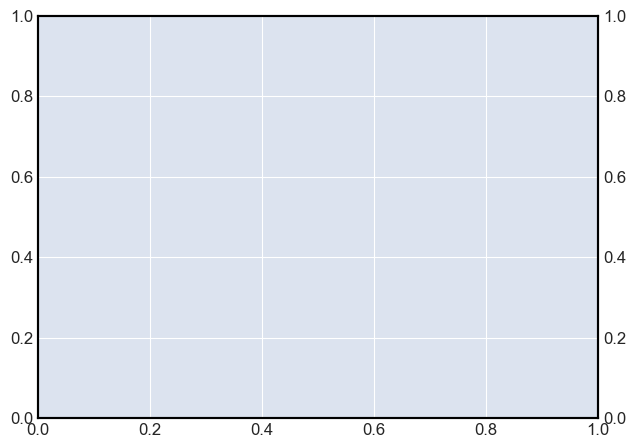

In [26]:
mpf.plot(dt, type='candle')

In [59]:
pd.core.index

<module 'pandas.core.index' from 'd:\\Users\\zhangyun29\\AppData\\Local\\Programs\\Python\\Python36-64\\lib\\site-packages\\pandas\\core\\index.py'>

In [38]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [27]:
def verity_valley_after_peak(lv_L):
    return True

In [39]:
verify_end_to_end(m.Lv1_L)

[[177.0, Point(192.0, 22.32, -1), Point(191.0, 22.26, 1)],
 [1668.0, Point(1679.0, 22.23, 1), Point(1676.0, 22.3, -1)],
 [1709.0, Point(1712.0, 21.74, -1), Point(1731.0, 21.68, -1)],
 [1946.0, Point(1949.0, 21.79, 1), Point(1968.0, 21.83, 1)],
 [1968.0, Point(1975.0, 21.85, 1), Point(1977.0, 21.95, -1)],
 [2464.0, Point(2504.0, 22.35, -1), Point(2491.0, 22.44, -1)],
 [2583.0, Point(2592.0, 22.15, -1), Point(2615.0, 22.15, -1)],
 [2792.0, Point(2803.0, 22.09, 1), Point(2851.0, 22.12, 1)],
 [2851.0, Point(2882.0, 22.18, -1), Point(2865.0, 22.26, -1)],
 [2865.0, Point(2873.0, 22.19, -1), Point(2884.0, 22.02, 1)],
 [3931.0, Point(3970.0, 22.71, 1), Point(3954.0, 22.63, 1)],
 [4589.0, Point(4594.0, 23.31, -1), Point(4596.0, 23.22, 1)],
 [5306.0, Point(5311.0, 24.3, 1), Point(5310.0, 24.34, -1)],
 [5364.0, Point(5373.0, 24.35, -1), Point(5371.0, 24.19, 1)],
 [5371.0, Point(5400.0, 24.39, -1), Point(5382.0, 24.44, -1)],
 [5382.0, Point(5393.0, 24.4, -1), Point(5399.0, 24.3, 1)],
 [5532.0, Poi

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [36]:
tmIdx = 15929


In [33]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [37]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

((1904, Stick(drt:1, lv:0, Point(15927.0, 33.11, 1))),
 (392, Trend1(1, 2, Point(15927.0, 33.11, 1))),
 (86, Trend2(1, 2, Point(15927.0, 33.11, 1))))

In [35]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [94]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [31]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [32]:
draw_k(15027,500)

AttributeError: 'str' object has no attribute 'get'

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [102]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


### draw Pair

In [105]:
p = find_pair(tmIdx,0)[1]
p.__dict__

{'P': 33.61,
 'S': 33.11,
 'TmS': 15927.0,
 'cc': 0.55,
 'ccHL': (7, 18, 33.28499999999999, 33.559999999999974),
 'chain_layer': 2,
 'core': 33.50999999999998,
 'core_index': 16,
 'drt': 1,
 'his': [[33.11,
   33.135,
   33.16,
   33.184999999999995,
   33.209999999999994,
   33.23499999999999,
   33.25999999999999,
   33.28499999999999,
   33.30999999999999,
   33.33499999999999,
   33.359999999999985,
   33.384999999999984,
   33.40999999999998,
   33.43499999999998,
   33.45999999999998,
   33.48499999999998,
   33.50999999999998,
   33.534999999999975,
   33.559999999999974,
   33.58499999999997,
   33.61],
  array([0.2       , 0.53333333, 0.53333333, 0.78333333, 0.45      ,
         0.25      , 0.45      , 0.2       , 0.2       , 0.2       ,
         0.84285714, 1.04285714, 0.54285714, 0.34285714, 0.25396825,
         0.97619048, 1.33730159, 0.69444444, 0.69444444, 0.47222222])],
 'index': [1904, 1905],
 'status': 1}

In [186]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [187]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

Point(15927.0, 33.11, 1)

In [188]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

Point(15936.0, 33.36, 1)

In [189]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


In [190]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,NaN,NaN,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,NaN,NaN,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,NaN,NaN,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,NaN,NaN,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,NaN,NaN,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,NaN,NaN,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,NaN,NaN,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,NaN,NaN,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,NaN,NaN,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,NaN,NaN,33.25,33.36,33.23,33.25


In [191]:
df_p

,TmIdx,V
0,15927,33.110000
2,15928,33.137778
3,15929,33.165556
4,15930,33.193333
5,15931,33.221111
6,15932,33.248889
7,15933,33.276667
8,15934,33.304444
9,15935,33.332222
1,15936,33.360000


In [193]:
df_draw.fillna('', inplace=True)
df_draw

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,,,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,,,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,,,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,,,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,,,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,,,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,,,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,,,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,,,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,,,33.25,33.36,33.23,33.25


In [201]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [198]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [199]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [200]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)